<a href="https://colab.research.google.com/github/mcharipar/Colabs/blob/main/Using_Google_Sheets.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Feel free to ask during office hours what is going on here.

# Using Google Sheets

###Mount Gdrive Folder
***Make sure to click on the link and copy and ctr+v the code in the box.***

In [ ]:
# from google.colab import drive
# drive.mount('/content/gdrive')

In [ ]:
# import pandas as pd
# import re

# ## Ggdrive file path (make sure that the path is correct, edit as necessary)
# df = pd.read_csv

# Saving data to Google Sheets


This snippet uses the open-source [gspread](https://github.com/burnash/gspread) library for interacting with Sheets.

In [ ]:
import pandas as pd
from google.colab import auth
auth.authenticate_user()

import gspread
from oauth2client.client import GoogleCredentials

gc = gspread.authorize(GoogleCredentials.get_application_default())

sh = gc.create('A new spreadsheet')

# Open our new sheet and add some data.
worksheet = gc.open('A new spreadsheet').sheet1

cell_list = worksheet.range('A1:C2')

import random
for cell in cell_list:
  cell.value = random.randint(1, 10)

worksheet.update_cells(cell_list)
# Go to https://sheets.google.com to see your new spreadsheet.

{'spreadsheetId': '1LrS3Gi410gegajOc9QyKzzzRv0iJmDPoUTVeKECp69U',
 'updatedCells': 6,
 'updatedColumns': 3,
 'updatedRange': 'Sheet1!A1:C2',
 'updatedRows': 2}

# Importing data from Google Sheets

In [ ]:
from google.colab import auth
auth.authenticate_user()

import gspread
from oauth2client.client import GoogleCredentials

gc = gspread.authorize(GoogleCredentials.get_application_default())

worksheet = gc.open('A new spreadsheet').sheet1

# get_all_values gives a list of rows.
rows = worksheet.get_all_values()
print(rows)

[['9', '10', '3'], ['2', '1', '7']]


In [ ]:
# Convert to a DataFrame and render.
df = pd.DataFrame.from_records(rows)
df.style

,0,1,2
0,9,10,3
1,2,1,7


In [ ]:
df

,0,1,2
0,9,10,3
1,2,1,7


## Plugining in Finance Data into the Sheet

In [ ]:
worksheet.update_cell(1,1, '=GOOGLEFINANCE("FB", "price", "5/7/2021", "8/7/2021")')

{'spreadsheetId': '1LrS3Gi410gegajOc9QyKzzzRv0iJmDPoUTVeKECp69U',
 'updatedCells': 1,
 'updatedColumns': 1,
 'updatedRange': 'Sheet1!A1',
 'updatedRows': 1}

In [ ]:
worksheet.update_cell(1,3, '=GOOGLEFINANCE("TSLA", "price", "5/7/2021", "8/7/2021")')

{'spreadsheetId': '1LrS3Gi410gegajOc9QyKzzzRv0iJmDPoUTVeKECp69U',
 'updatedCells': 1,
 'updatedColumns': 1,
 'updatedRange': 'Sheet1!C1',
 'updatedRows': 1}

In [ ]:
worksheet.update_cell(1,5, '=GOOGLEFINANCE("GOOG", "price", "5/7/2021", "8/7/2021")')

{'spreadsheetId': '1LrS3Gi410gegajOc9QyKzzzRv0iJmDPoUTVeKECp69U',
 'updatedCells': 1,
 'updatedColumns': 1,
 'updatedRange': 'Sheet1!E1',
 'updatedRows': 1}

In [ ]:
worksheet.update_cell(1,7, '=GOOGLEFINANCE("VIX", "price", "5/7/2021", "8/7/2021")')

{'spreadsheetId': '1LrS3Gi410gegajOc9QyKzzzRv0iJmDPoUTVeKECp69U',
 'updatedCells': 1,
 'updatedColumns': 1,
 'updatedRange': 'Sheet1!G1',
 'updatedRows': 1}

In [ ]:
## let G Sheets catch up
import time
time.sleep(15) 

In [ ]:
gc = gspread.authorize(GoogleCredentials.get_application_default())

worksheet = gc.open('A new spreadsheet').sheet1

# get_all_values gives a list of rows.
rows = worksheet.get_all_values()
df2 = pd.DataFrame.from_records(rows)
df2

,0,1,2,3,4,5,6,7
0,Date,Close,Date,Close,Date,Close,Date,Close
1,5/7/2021 16:00:00,319.08,5/7/2021 16:00:00,672.37,5/7/2021 16:00:00,2398.69,5/7/2021 15:16:00,16.69
2,5/10/2021 16:00:00,305.97,5/10/2021 16:00:00,629.04,5/10/2021 16:00:00,2341.66,5/10/2021 15:16:00,19.66
3,5/11/2021 16:00:00,306.53,5/11/2021 16:00:00,617.2,5/11/2021 16:00:00,2308.76,5/11/2021 15:16:00,21.84
4,5/12/2021 16:00:00,302.55,5/12/2021 16:00:00,589.89,5/12/2021 16:00:00,2239.08,5/12/2021 15:16:00,27.59
...,...,...,...,...,...,...,...,...
60,8/2/2021 16:00:00,351.95,8/2/2021 16:00:00,709.67,8/2/2021 16:00:00,2719.79,8/2/2021 15:16:00,19.46
61,8/3/2021 16:00:00,351.24,8/3/2021 16:00:00,709.74,8/3/2021 16:00:00,2725.6,8/3/2021 15:16:00,18.04
62,8/4/2021 16:00:00,358.92,8/4/2021 16:00:00,710.92,8/4/2021 16:00:00,2720.57,8/4/2021 15:16:00,17.97
63,8/5/2021 16:00:00,362.97,8/5/2021 16:00:00,714.63,8/5/2021 16:00:00,2738.8,8/5/2021 15:16:00,17.28



### If the dataframe shows up as off, reformat in the google sheet itself

In [ ]:
time.sleep(3) 

In [ ]:
df2 = df2.iloc[:,[0,1,3,5,7]]
df2

,0,1,3,5,7
0,Date,Close,Close,Close,Close
1,5/7/2021 16:00:00,319.08,672.37,2398.69,16.69
2,5/10/2021 16:00:00,305.97,629.04,2341.66,19.66
3,5/11/2021 16:00:00,306.53,617.2,2308.76,21.84
4,5/12/2021 16:00:00,302.55,589.89,2239.08,27.59
...,...,...,...,...,...
60,8/2/2021 16:00:00,351.95,709.67,2719.79,19.46
61,8/3/2021 16:00:00,351.24,709.74,2725.6,18.04
62,8/4/2021 16:00:00,358.92,710.92,2720.57,17.97
63,8/5/2021 16:00:00,362.97,714.63,2738.8,17.28


In [ ]:
df2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 65 entries, 0 to 64
Data columns (total 5 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   0       65 non-null     object
 1   1       65 non-null     object
 2   3       65 non-null     object
 3   5       65 non-null     object
 4   7       65 non-null     object
dtypes: object(5)
memory usage: 2.7+ KB


In [ ]:
df2.loc[0].tolist()

['Date', 'Close', 'Close', 'Close', 'Close']

In [ ]:
df3 = df2.loc[1:]
df3

,0,1,3,5,7
1,5/7/2021 16:00:00,319.08,672.37,2398.69,16.69
2,5/10/2021 16:00:00,305.97,629.04,2341.66,19.66
3,5/11/2021 16:00:00,306.53,617.2,2308.76,21.84
4,5/12/2021 16:00:00,302.55,589.89,2239.08,27.59
5,5/13/2021 16:00:00,305.26,571.69,2261.97,23.13
...,...,...,...,...,...
60,8/2/2021 16:00:00,351.95,709.67,2719.79,19.46
61,8/3/2021 16:00:00,351.24,709.74,2725.6,18.04
62,8/4/2021 16:00:00,358.92,710.92,2720.57,17.97
63,8/5/2021 16:00:00,362.97,714.63,2738.8,17.28


In [ ]:
df3.columns.tolist()

[0, 1, 3, 5, 7]

In [ ]:
df3.columns = df2.loc[0].tolist()

In [ ]:
df3

,Date,Close,Close,Close,Close
1,5/7/2021 16:00:00,319.08,672.37,2398.69,16.69
2,5/10/2021 16:00:00,305.97,629.04,2341.66,19.66
3,5/11/2021 16:00:00,306.53,617.2,2308.76,21.84
4,5/12/2021 16:00:00,302.55,589.89,2239.08,27.59
5,5/13/2021 16:00:00,305.26,571.69,2261.97,23.13
...,...,...,...,...,...
60,8/2/2021 16:00:00,351.95,709.67,2719.79,19.46
61,8/3/2021 16:00:00,351.24,709.74,2725.6,18.04
62,8/4/2021 16:00:00,358.92,710.92,2720.57,17.97
63,8/5/2021 16:00:00,362.97,714.63,2738.8,17.28


In [ ]:
df3 = df3.set_index(pd.to_datetime(df3['Date']))
type(df3.index)

pandas.core.indexes.datetimes.DatetimeIndex

In [ ]:
df3 = df3.iloc[1:,1:]

In [ ]:
df3.dtypes

Close    object
Close    object
Close    object
Close    object
dtype: object

In [ ]:
df3 = df3.astype('float64')
df3.dtypes

Close    float64
Close    float64
Close    float64
Close    float64
dtype: object

In [ ]:
df3

,Close,Close,Close,Close
Date,,,,
2021-05-10 16:00:00,305.97,629.04,2341.66,19.66
2021-05-11 16:00:00,306.53,617.20,2308.76,21.84
2021-05-12 16:00:00,302.55,589.89,2239.08,27.59
2021-05-13 16:00:00,305.26,571.69,2261.97,23.13
2021-05-14 16:00:00,315.94,589.74,2316.16,18.81
...,...,...,...,...
2021-08-02 16:00:00,351.95,709.67,2719.79,19.46
2021-08-03 16:00:00,351.24,709.74,2725.60,18.04
2021-08-04 16:00:00,358.92,710.92,2720.57,17.97


In [ ]:
colList = df3.columns.to_list()
colList

['Close', 'Close', 'Close', 'Close']

In [ ]:
stockList = ['FB', 'TSLA', 'GOOG', 'VIX']
stockList

['FB', 'TSLA', 'GOOG', 'VIX']

In [ ]:
mstList = []
mstList.append(stockList)
mstList.append(colList)

mstList

[['FB', 'TSLA', 'GOOG', 'VIX'], ['Close', 'Close', 'Close', 'Close']]

In [ ]:
pd.MultiIndex.from_arrays(mstList)

MultiIndex([(  'FB', 'Close'),
            ('TSLA', 'Close'),
            ('GOOG', 'Close'),
            ( 'VIX', 'Close')],
           )

In [ ]:
df3.columns = mstList

In [ ]:
df3

,FB,TSLA,GOOG,VIX
,Close,Close,Close,Close
Date,,,,
2021-05-10 16:00:00,305.97,629.04,2341.66,19.66
2021-05-11 16:00:00,306.53,617.20,2308.76,21.84
2021-05-12 16:00:00,302.55,589.89,2239.08,27.59
2021-05-13 16:00:00,305.26,571.69,2261.97,23.13
2021-05-14 16:00:00,315.94,589.74,2316.16,18.81
...,...,...,...,...
2021-08-02 16:00:00,351.95,709.67,2719.79,19.46
2021-08-03 16:00:00,351.24,709.74,2725.60,18.04


In [ ]:
df3.describe()

,FB,TSLA,GOOG,VIX
,Close,Close,Close,Close
count,63.000000,63.000000,63.000000,63.000000
mean,339.087937,637.267143,2530.545397,18.012857
std,17.245996,39.283303,139.111292,2.213566
min,302.550000,563.460000,2239.080000,15.070000
25%,329.140000,605.125000,2425.545000,16.405000
50%,339.030000,643.380000,2527.420000,17.690000
75%,351.920000,664.520000,2623.680000,18.825000
max,373.280000,714.630000,2792.890000,27.590000


In [ ]:
for x in df3:
  print("{}\n".format(x[0]) + str(df3[x[0]].describe()) + '\n')

FB
            Close
count   63.000000
mean   339.087937
std     17.245996
min    302.550000
25%    329.140000
50%    339.030000
75%    351.920000
max    373.280000

TSLA
            Close
count   63.000000
mean   637.267143
std     39.283303
min    563.460000
25%    605.125000
50%    643.380000
75%    664.520000
max    714.630000

GOOG
             Close
count    63.000000
mean   2530.545397
std     139.111292
min    2239.080000
25%    2425.545000
50%    2527.420000
75%    2623.680000
max    2792.890000

VIX
           Close
count  63.000000
mean   18.012857
std     2.213566
min    15.070000
25%    16.405000
50%    17.690000
75%    18.825000
max    27.590000



In [ ]:
for x in df3:
  print("{}\n".format(x[0]) + 'Sum: ' + str(df3[x[0]].sum()) + '\n' +
        'Var: ' + str(df3[x[0]].var()) +  '\nMedian: ' + str(df3[x[0]].median()) + '\n')

FB
Sum: Close    21362.54
dtype: float64
Var: Close    297.424368
dtype: float64
Median: Close    339.03
dtype: float64

TSLA
Sum: Close    40147.83
dtype: float64
Var: Close    1543.17793
dtype: float64
Median: Close    643.38
dtype: float64

GOOG
Sum: Close    159424.36
dtype: float64
Var: Close    19351.951532
dtype: float64
Median: Close    2527.42
dtype: float64

VIX
Sum: Close    1134.81
dtype: float64
Var: Close    4.899872
dtype: float64
Median: Close    17.69
dtype: float64



In [ ]:
for x in df3:
  print("{}: ".format(x[0]) + str(df3[(x)].sum()))

FB: 21362.54
TSLA: 40147.82999999999
GOOG: 159424.36000000004
VIX: 1134.8100000000002


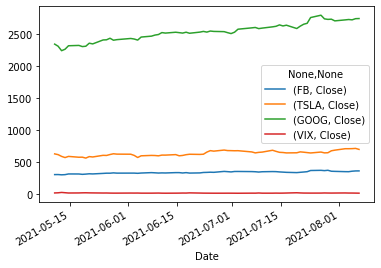

In [ ]:
df3.plot()

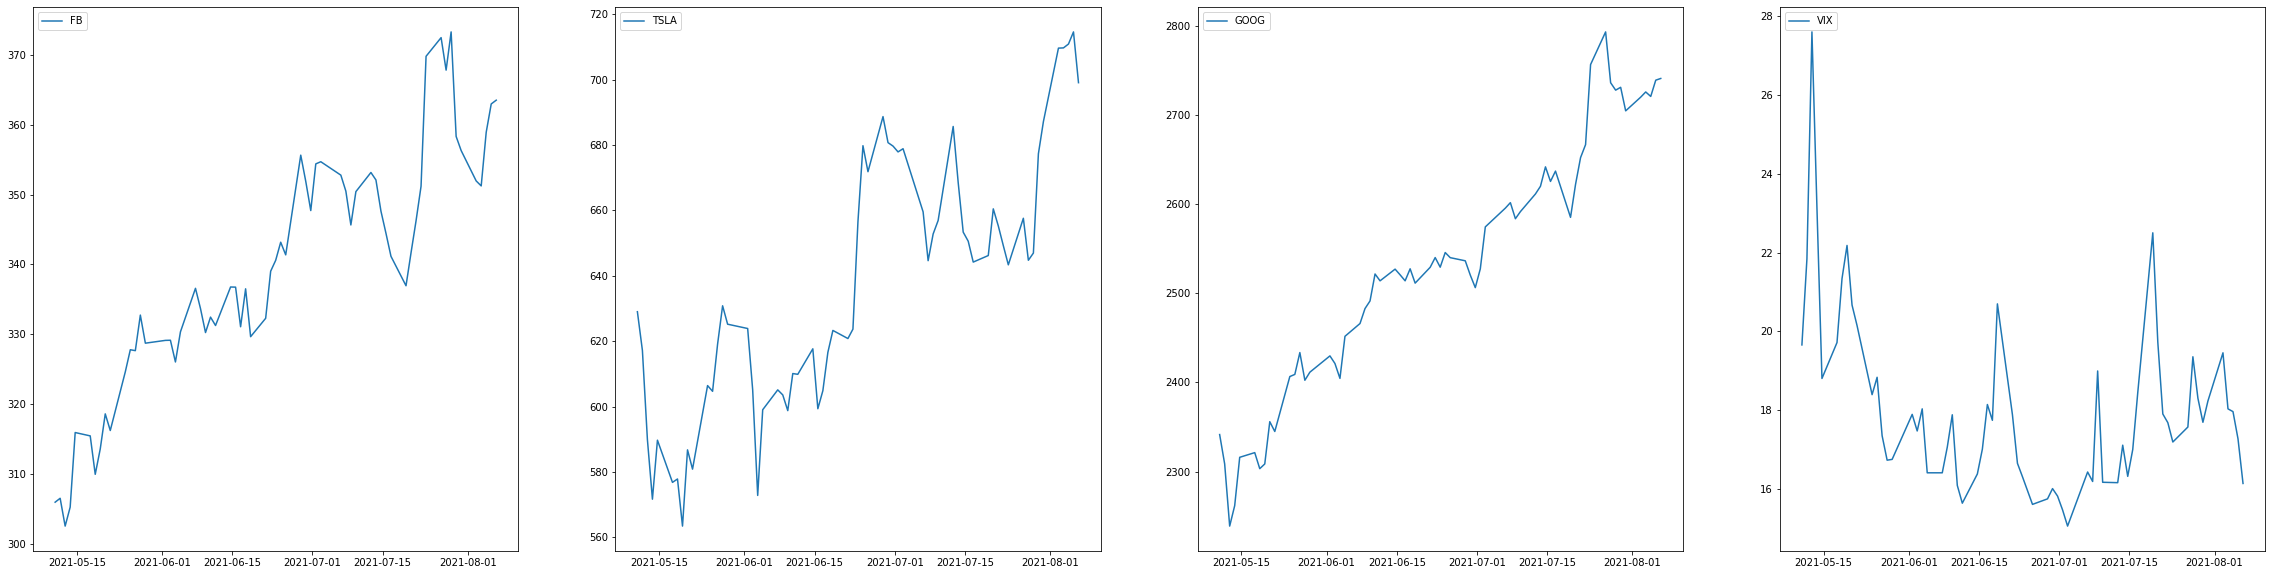

In [ ]:
import matplotlib.pyplot as plt

i = 0
f = plt.figure(figsize=(40,10))


for x in df3:
  i += 1
  f.add_subplot(1,len(df3.columns),i)
  plt.plot(df3[x], label=x[0])
  plt.legend(loc='upper left')


plt.show()

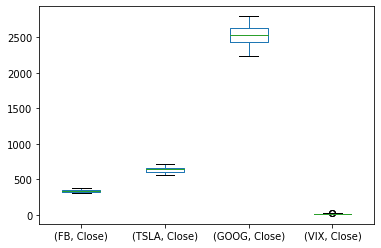

In [ ]:
df3.plot.box()

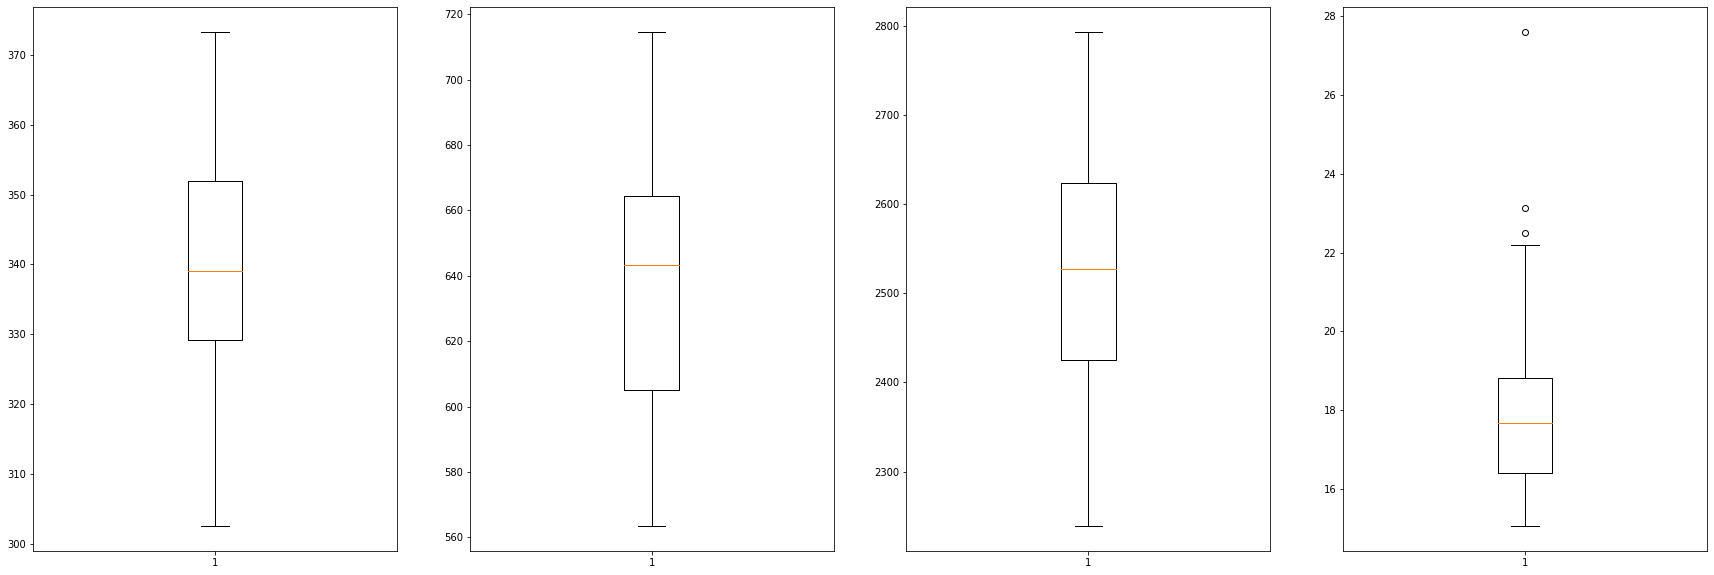

In [ ]:
import matplotlib.pyplot as plt

i = 0
f = plt.figure(figsize=(30,10))

for x in df3:
  i += 1
  f.add_subplot(1,len(df3.columns),i)
  plt.boxplot(df3[x])


plt.show()

In [ ]:
import numpy as np

def sharpe_ratio(cols):
  return ((cols.mean() * 252) / (cols.std() * np.sqrt(252)))

In [ ]:
print('Sharpe\'s Ratio:')

for x in df3:
  print(str(x[0]) + ':' + '\t' + str(sharpe_ratio(df3[(x)])))

Sharpe's Ratio:
FB:	312.1219675555432
TSLA:	257.5216792450178
GOOG:	288.7699644074574
VIX:	129.1785757827559


In [ ]:
df4 = df3.index
timeVal = []
for x in df4:
  timeVal.append(str(x))

type(timeVal[0])

str

In [ ]:
ultList = []
stockDate = timeVal
stockVals = df3.to_numpy().tolist()
z = 0

while z != len(stockDate):
  mstrStock = []
  mstrStock.append(stockDate[z])
  for y in stockVals[z]:
    mstrStock.append(y)
  ultList.append(mstrStock)
  z += 1

In [ ]:
type(stockDate[0])

str

In [ ]:
q = 0
while q != len(ultList):
  worksheet.insert_row(ultList[q], index=q+1)
  q += 1

## See What the File Looks Like in Google Sheets Now

What happended to the data we loaded originaly into the DF?

In [ ]:
# Save to a csv in my Gdrive
# df3.to_csv('/content/gdrive/My Drive/Some_Name_Here.csv')